In [66]:
import numpy as np
import serial, time
import matplotlib.pyplot as plt
from IPython import display
from datetime import timedelta
%matplotlib inline
import pandas as pd

In [67]:
try:
    s = serial.Serial('COM25',115200)
except IOError: 
    print('no s')

try:
    curtain = serial.Serial('COM4',9600)
except IOError: 
    print('no curtain')

try:
    d = serial.Serial('COM23')
except IOError: 
    print('no d')
    
try:
    maestro = serial.Serial('COM17',115200)
except IOError: 
    print('no maestro')

power_base 0.00507624
power_temp 0.00510663
power_temp 0.00510773
power_temp 0.00510687
power_temp 0.00510309
power_temp 0.00510236
power_temp 0.00510114
power_temp 0.00510068
power_temp 0.00509898
power_temp 0.00509976
power_temp 0.0050995
power_temp 0.0050986
power_temp 0.00509878
power_temp 0.00509637
5279.0 4084.0 492.0


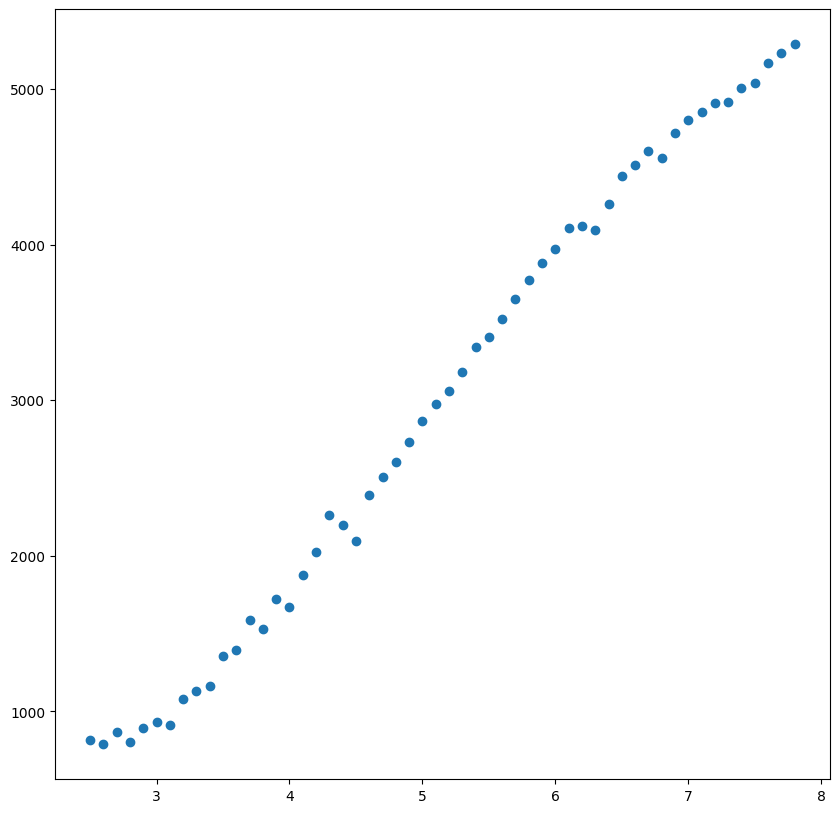

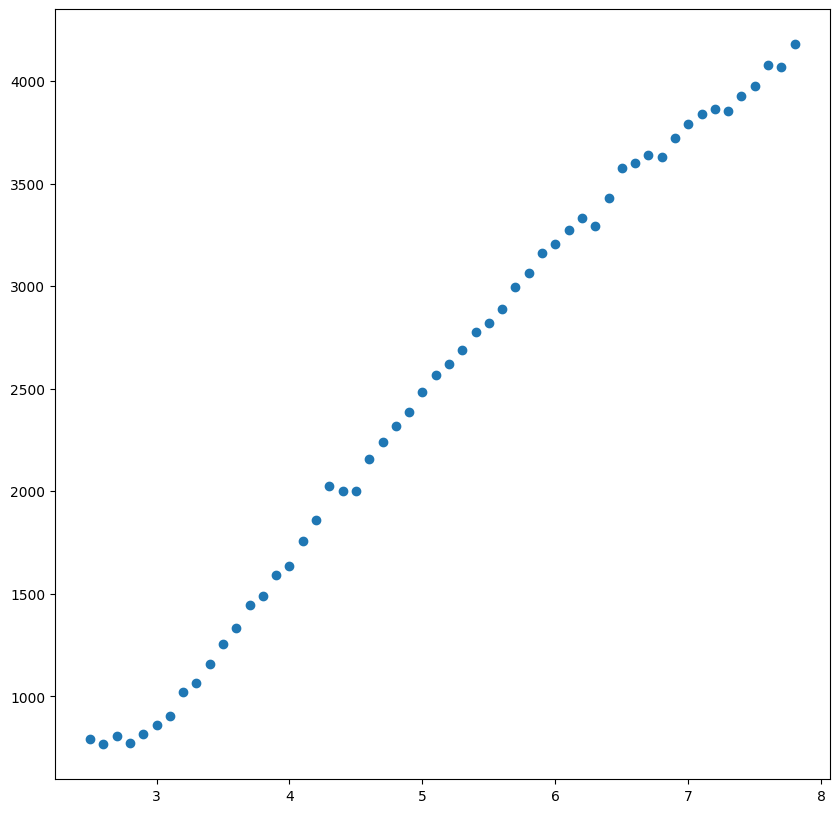

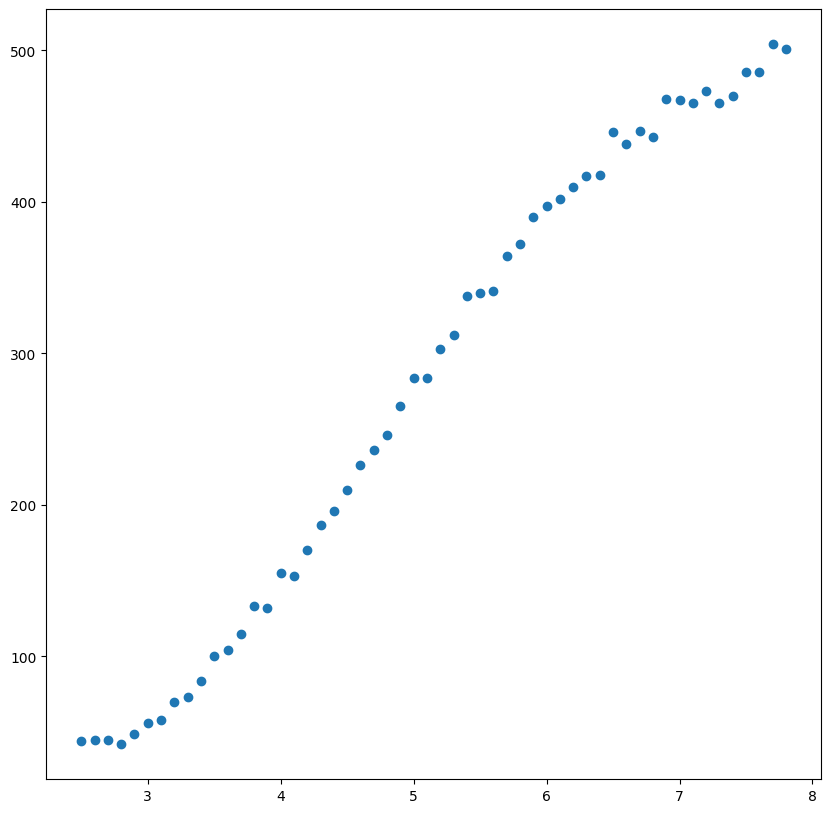

NameError: name 'datetime' is not defined

In [68]:
l = int(input())
values = bytes.fromhex('111140014400000000001111400153000A0000001111400150004600000011114001470000000000')
mas_sum_1 = np.zeros(100)
mas_sum_2 = np.zeros(100)
mas_sum_3 = np.zeros(100)

power_abs=[]
power_rel=[]

x = np.zeros(100)

df = pd.DataFrame(columns = ['mas_sum_1', 'mas_sum_1_error',
                             'mas_sum_2', 'mas_sum_2_error', 
                             'mas_sum_3', 'mas_sum_3_error',
                             'power_abs', 'power_rel'])

for i in range(55):
    print(i)
    display.clear_output(wait=True)
    x[i] = 2.5 + 0.1 * i
    s.reset_input_buffer()
    s.readline()
    s.reset_input_buffer()
    readings = [[],[],[]]
    
    
    command = str(90)       # to measure noise
    curtain.write(command.encode('utf-8'))
    time.sleep(2)
    
    while  len(readings[1]) <= l:
        raw_reading = s.readline().decode(errors='ignore')
        reading = [int(part.strip()) for part in raw_reading.split('\t')] 
        for k in range(3):
            readings[k].append(reading[k])            
        noise1 = int(np.mean(readings[0][-l:]))
        noise2 = int(np.mean(readings[1][-l:]))
        noise3 = int(np.mean(readings[2][-l:]))
        
    s.reset_input_buffer()
    s.readline()
    s.reset_input_buffer()
    readings = [[],[],[]]
    
    
    command = str(0)       # to measure signal
    curtain.write(command.encode('utf-8'))
    time.sleep(2)
    
    time.sleep(5)
    temp_power = []
    for _ in range(l):
        maestro.write(b'*CVU')
        temp_power.append(maestro.readline().decode().strip())
    power_base = np.mean(temp)
    time.sleep(6)
    
    while  len(readings[1]) <= l:
        raw_reading = s.readline().decode(errors='ignore')
        reading = [int(part.strip()) for part in raw_reading.split('\t')] 
        for k in range(3):
            readings[k].append(reading[k])
            
        time.sleep(0.5)    
        temp = 0
        maestro.write(b'*CVU')
        temp = maestro.readline().decode().strip()
        print('power_temp', temp)
        power_temp = temp
        
        power_rel.append(float(power_temp)/float(power_base))
        power_abs.append(float(power_temp))
            
        error_1 = np.std(readings[0][-l:])
        error_2 = np.std(readings[1][-l:])
        error_3 = np.std(readings[2][-l:])
        
        mas_sum_1[i] = int((int(np.mean(readings[0][-l:])) - noise1)/(float(power_temp)/float(power_base)))
        mas_sum_2[i] = int((int(np.mean(readings[1][-l:])) - noise2)/(float(power_temp)/float(power_base)))
        mas_sum_3[i] = int((int(np.mean(readings[2][-l:])) - noise3)/(float(power_temp)/float(power_base)))
        
    new_row = {'mas_sum_1': mas_sum_1[i], 'mas_sum_1_error': error_1,
               'mas_sum_2': mas_sum_2[i], 'mas_sum_2_error': error_2,
               'mas_sum_3': mas_sum_3[i], 'mas_sum_3_error': error_3,
               'power_abs' : power_abs[i], 'power_rel' : power_rel[i]
              }
    df.append(new_row, ignore_index=True)
        
    print(mas_sum_1[i], mas_sum_2[i], mas_sum_3[i])
    
#     fig1 = plt.figure(figsize = (10,10))
#     plt.scatter(x[:i], mas_sum_1[:i])
    
    plt.subplots(1, 3, 1)
    plt.errorbar(x[:i], df.loc['mas_sum_1'], yerr=df.loc['mas_sum_1_error'])
    plt.title('mas_sum_1')
    
#     fig2 = plt.figure(figsize = (10,10))
#     plt.scatter(x[:i], mas_sum_2[:i])
        
    plt.subplots(1, 3, 2)
    plt.errorbar(x[:i], df.loc['mas_sum_2'], yerr=df.loc['mas_sum_2_error'])
    plt.title('mas_sum_2')
    
#     fig3 = plt.figure(figsize = (10,10))
#     plt.scatter(x[:i], mas_sum_3[:i])
    
    plt.subplots(1, 3, 3)
    plt.errorbar(x[:i], df.loc['mas_sum_3'], yerr=df.loc['mas_sum_3_error'])
    plt.title('mas_sum_3')
    
    plt.show()
    
    d.write(values)
    time.sleep(2)
    
now = datetime.datetime.now()
filename = 'result_{}.csv'.format(now.strftime('%Y-%m-%d_%H-%M-%S'))
df.to_scv(filename, index=False)
    
# np.save('Exp Data\\Dia1\\' + "%s_mas_sum1"%time.strftime('%Y-%m-%d_%H-%M'), mas_sum_1)
# np.save('Exp Data\\Dia1\\'+"%s_mas_sum2"%time.strftime('%Y-%m-%d_%H-%M'), mas_sum_2)
# np.save('Exp Data\\Dia1\\'+"%s_mas_sum3"%time.strftime('%Y-%m-%d_%H-%M'), mas_sum_3)
# np.save('Exp Data\\Dia1\\'+"%s_x"%time.strftime('%Y-%m-%d_%H-%M'), x)
# fig3.savefig("Exp Data\\Dia1\\" +"%s_plot.png"%time.strftime('%Y-%m-%d_%H-%M'))

In [65]:
try:
    if s.is_open:
        s.close()
except IOError: 
    pass
try:
    if d.is_open:
        d.close()
except IOError: 
    pass
try:
    if curtain.is_open:
        curtain.close()
except IOError: 
    pass
try:
    if maestro.is_open:
        maestro.close()
except IOError: 
    pass